In [30]:
import pandas as pd
df = pd.read_csv("NPHA-doctor-visits.csv")

In [31]:
df.info()
df.describe()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 15 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Number of Doctors Visited                   714 non-null    int64
 1   Age                                         714 non-null    int64
 2   Phyiscal Health                             714 non-null    int64
 3   Mental Health                               714 non-null    int64
 4   Dental Health                               714 non-null    int64
 5   Employment                                  714 non-null    int64
 6   Stress Keeps Patient from Sleeping          714 non-null    int64
 7   Medication Keeps Patient from Sleeping      714 non-null    int64
 8   Pain Keeps Patient from Sleeping            714 non-null    int64
 9   Bathroom Needs Keeps Patient from Sleeping  714 non-null    int64
 10  Uknown Keeps Patient from Sleeping    

,Number of Doctors Visited,Age,Phyiscal Health,Mental Health,Dental Health,Employment,Stress Keeps Patient from Sleeping,Medication Keeps Patient from Sleeping,Pain Keeps Patient from Sleeping,Bathroom Needs Keeps Patient from Sleeping,Uknown Keeps Patient from Sleeping,Trouble Sleeping,Prescription Sleep Medication,Race,Gender
0,3,2,4,3,3,3,0,0,0,0,1,2,3,1,2
1,2,2,4,2,3,3,1,0,0,1,0,3,3,1,1
2,3,2,3,2,3,3,0,0,0,0,1,3,3,4,1
3,1,2,3,2,3,3,0,0,0,1,0,3,3,4,2
4,3,2,3,3,3,3,1,0,0,0,0,2,3,1,2


I removed spaces from the column names to make them easier to work with, and checked to make sure there wasn't any missing data.

In [32]:
# Clean up column names: remove spaces and replace them with underscores
# This makes it easier to type them out later (e.g., df.Column_Name instead of df['Column Name'])
clean_names = {c: c.strip().replace(' ', '_') for c in df.columns}
df = df.rename(columns=clean_names)
df.head()

,Number_of_Doctors_Visited,Age,Phyiscal_Health,Mental_Health,Dental_Health,Employment,Stress_Keeps_Patient_from_Sleeping,Medication_Keeps_Patient_from_Sleeping,Pain_Keeps_Patient_from_Sleeping,Bathroom_Needs_Keeps_Patient_from_Sleeping,Uknown_Keeps_Patient_from_Sleeping,Trouble_Sleeping,Prescription_Sleep_Medication,Race,Gender
0,3,2,4,3,3,3,0,0,0,0,1,2,3,1,2
1,2,2,4,2,3,3,1,0,0,1,0,3,3,1,1
2,3,2,3,2,3,3,0,0,0,0,1,3,3,4,1
3,1,2,3,2,3,3,0,0,0,1,0,3,3,4,2
4,3,2,3,3,3,3,1,0,0,0,0,2,3,1,2


In [33]:
# null check
df.isnull().sum()

Number_of_Doctors_Visited                     0
Age                                           0
Phyiscal_Health                               0
Mental_Health                                 0
Dental_Health                                 0
Employment                                    0
Stress_Keeps_Patient_from_Sleeping            0
Medication_Keeps_Patient_from_Sleeping        0
Pain_Keeps_Patient_from_Sleeping              0
Bathroom_Needs_Keeps_Patient_from_Sleeping    0
Uknown_Keeps_Patient_from_Sleeping            0
Trouble_Sleeping                              0
Prescription_Sleep_Medication                 0
Race                                          0
Gender                                        0
dtype: int64

All columns reported zero missing values after renaming.

Seems like there isn't any nulls in the datasets 

Let's see the min and max values from each feature

In [34]:
df.min()

Number_of_Doctors_Visited                     1
Age                                           2
Phyiscal_Health                              -1
Mental_Health                                -1
Dental_Health                                -1
Employment                                    1
Stress_Keeps_Patient_from_Sleeping            0
Medication_Keeps_Patient_from_Sleeping        0
Pain_Keeps_Patient_from_Sleeping              0
Bathroom_Needs_Keeps_Patient_from_Sleeping    0
Uknown_Keeps_Patient_from_Sleeping            0
Trouble_Sleeping                             -1
Prescription_Sleep_Medication                -1
Race                                          1
Gender                                        1
dtype: int64

In [35]:
df.max()

Number_of_Doctors_Visited                     3
Age                                           2
Phyiscal_Health                               5
Mental_Health                                 5
Dental_Health                                 6
Employment                                    4
Stress_Keeps_Patient_from_Sleeping            1
Medication_Keeps_Patient_from_Sleeping        1
Pain_Keeps_Patient_from_Sleeping              1
Bathroom_Needs_Keeps_Patient_from_Sleeping    1
Uknown_Keeps_Patient_from_Sleeping            1
Trouble_Sleeping                              3
Prescription_Sleep_Medication                 3
Race                                          5
Gender                                        2
dtype: int64

The documentation says "Trouble Sleeping" should just be 0 (No) or 1 (Yes). But looking at the data, there are higher numbers, which is a bit confusing.

In [36]:
print(df['Trouble_Sleeping'])
print(df['Trouble_Sleeping'].min())
# new binary: 0 = no trouble, 1 = any trouble
df['Trouble_Sleeping_Binary'] = (df['Trouble_Sleeping'] > 0).astype(int)
print(df['Trouble_Sleeping_Binary'].value_counts())

0      2
1      3
2      3
3      3
4      2
      ..
709    3
710    2
711    3
712    3
713    2
Name: Trouble_Sleeping, Length: 714, dtype: int64
-1
Trouble_Sleeping_Binary
1    712
0      2
Name: count, dtype: int64


#### Preprocessing and Target Setup
- I'm turning the number of doctor visits into a simple "High Visits" yes/no target.
- I'll try a few cutoffs (like 4 visits, then 3, then 2) to find one that gives us a good mix of people in both groups.
- I'm also swapping out the original `Trouble_Sleeping` column for the simpler yes/no version I made.

In [37]:
# Split the data into "High Visits" and "Low Visits".
# Try a few different cutoffs (4 visits, 3 visits, etc.) to find one that actually gives two groups.
# If the cutoff is too high, everyone might end up in the "Low" group, which breaks the model.

possible_cutoffs = [4, 3, 2]
chosen_threshold = None

for cutoff in possible_cutoffs:
    # Create a temporary target: 1 if visits >= cutoff, 0 otherwise
    temp_target = (df['Number_of_Doctors_Visited'] >= cutoff).astype(int)
    
    # Check if we have at least one person in the "High" group
    num_high_visits = temp_target.sum()
    
    if num_high_visits > 0 and num_high_visits < len(temp_target):
        chosen_threshold = cutoff
        target = temp_target
        break

if chosen_threshold is None:
    raise ValueError("Couldn't find a good cutoff! The data might be too skewed.")

# Save the target on the dataframe
df['High_Visits'] = target

# drop the original visits column so the model can't "cheat"
# Also drop the old multi-level sleep column and keep the cleaned binary one
features = df.drop(columns=['High_Visits', 'Number_of_Doctors_Visited', 'Trouble_Sleeping'])

print(f"I'm using {chosen_threshold} or more visits as the cutoff for 'High Visits'.")
print("Here is the breakdown of the classes:")
print(target.value_counts())

features.head()

I'm using 3 or more visits as the cutoff for 'High Visits'.
Here is the breakdown of the classes:
Number_of_Doctors_Visited
0    503
1    211
Name: count, dtype: int64


,Age,Phyiscal_Health,Mental_Health,Dental_Health,Employment,Stress_Keeps_Patient_from_Sleeping,Medication_Keeps_Patient_from_Sleeping,Pain_Keeps_Patient_from_Sleeping,Bathroom_Needs_Keeps_Patient_from_Sleeping,Uknown_Keeps_Patient_from_Sleeping,Prescription_Sleep_Medication,Race,Gender,Trouble_Sleeping_Binary
0,2,4,3,3,3,0,0,0,0,1,3,1,2,1
1,2,4,2,3,3,1,0,0,1,0,3,1,1,1
2,2,3,2,3,3,0,0,0,0,1,3,4,1,1
3,2,3,2,3,3,0,0,0,1,0,3,4,2,1
4,2,3,3,3,3,1,0,0,0,0,3,1,2,1


#### Building the Models
Trying three simple models to see what works best:
1. **Logistic Regression** (good for finding simple relationships)
2. **KNN** (looks at similar patients)
3. **Decision Tree** (makes a flowchart of rules)

Note: I'll scale the data for the first two because they care about the size of the numbers, but the Decision Tree doesn't need that.

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Split the data: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, random_state=42, stratify=target
)

print("Training set breakdown:\n", y_train.value_counts())
print("\nTest set breakdown:\n", y_test.value_counts())

# Define the models we want to test
models = {
    'Logistic Regression': make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000)),
    'KNN (5 Neighbors)': make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=5)),
    'Decision Tree': DecisionTreeClassifier(max_depth=5, random_state=42)
}

# Loop through each model, train it, and check its accuracy
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    print(f"{name} Accuracy: {acc:.3f}")

Training set breakdown:
 Number_of_Doctors_Visited
0    402
1    169
Name: count, dtype: int64

Test set breakdown:
 Number_of_Doctors_Visited
0    101
1     42
Name: count, dtype: int64
Logistic Regression Accuracy: 0.706
KNN (5 Neighbors) Accuracy: 0.657
Decision Tree Accuracy: 0.720


Here are the accuracy scores to see which model did the best job. The code handles the scaling automatically for the models that need it.

### Visualizations
Now let's look at the confusion matrices to see where the models are making mistakes, and check which features are driving the predictions.

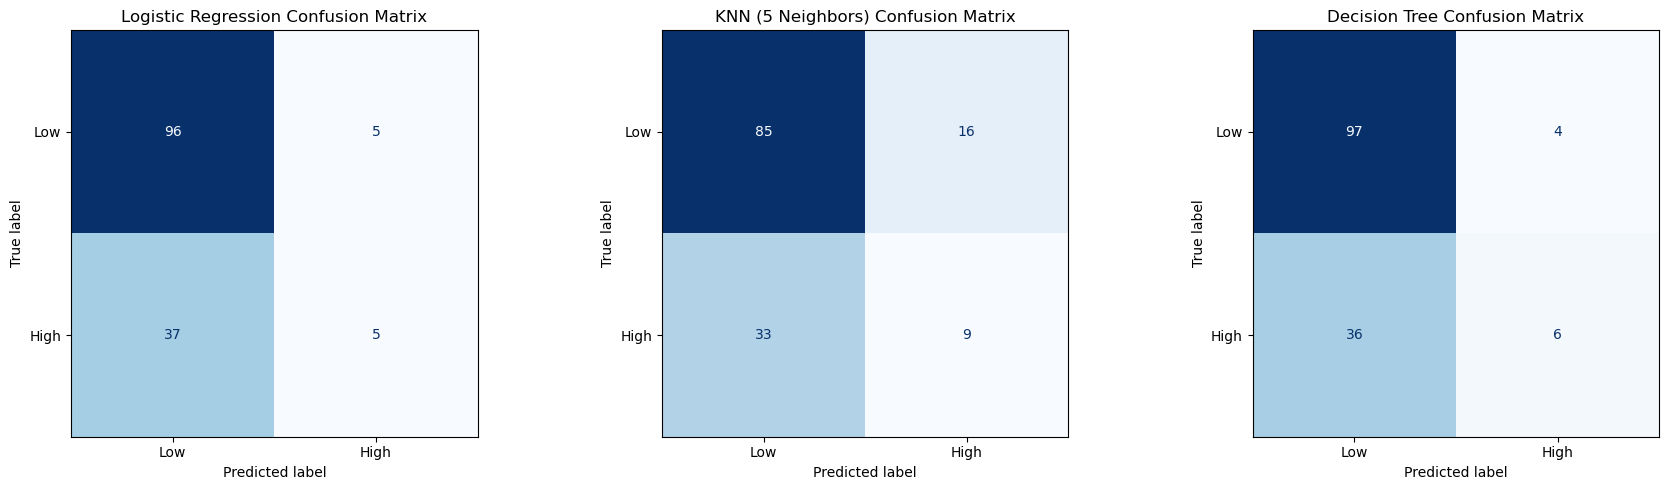

In [39]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Create a figure with 3 subplots (one for each model)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, (name, model) in enumerate(models.items()):
    # Get predictions
    preds = model.predict(X_test)
    
    # Compute confusion matrix
    cm = confusion_matrix(y_test, preds)
    
    # Plot
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Low', 'High'])
    disp.plot(ax=axes[i], cmap='Blues', colorbar=False)
    axes[i].set_title(f"{name} Confusion Matrix")

plt.tight_layout()
plt.savefig('Images/confusion_matrices.png')
plt.show()

C:\Users\Legen\AppData\Local\Temp\ipykernel_24976\3354143014.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coefs, palette='viridis')


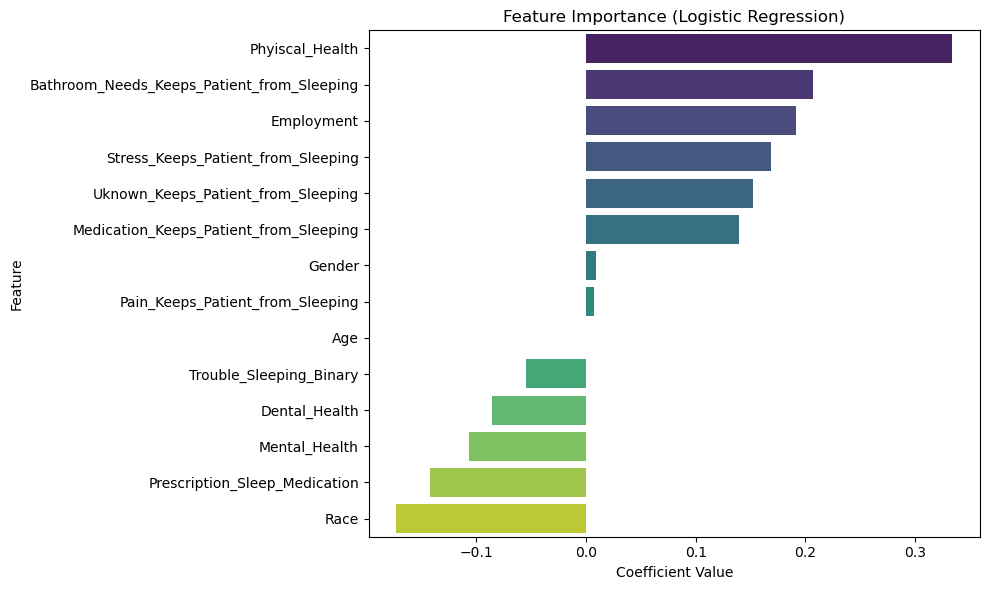

C:\Users\Legen\AppData\Local\Temp\ipykernel_24976\3354143014.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importances, palette='magma')


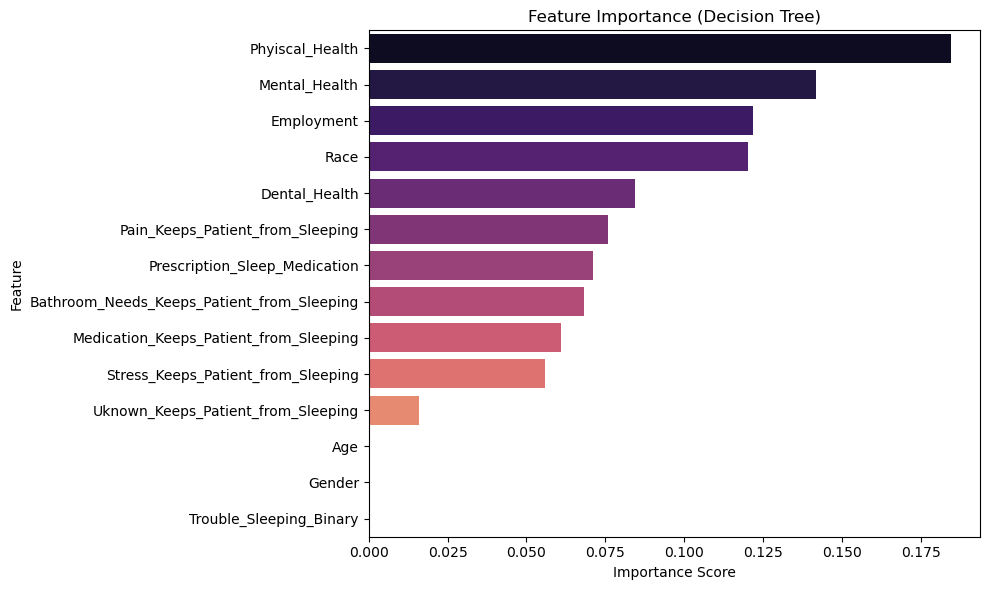

In [40]:
import numpy as np
import seaborn as sns

# 1. Logistic Regression Coefficients
log_reg_model = models['Logistic Regression'].named_steps['logisticregression']
coefs = pd.DataFrame({
    'Feature': features.columns,
    'Coefficient': log_reg_model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefs, palette='viridis')
plt.title('Feature Importance (Logistic Regression)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.tight_layout()
plt.savefig('Images/feature_importance_logreg.png')
plt.show()

# 2. Decision Tree Feature Importance
tree_model = models['Decision Tree']
importances = pd.DataFrame({
    'Feature': features.columns,
    'Importance': tree_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importances, palette='magma')
plt.title('Feature Importance (Decision Tree)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.savefig('Images/feature_importance_tree.png')
plt.show()